# 測試 paddleocr 官方模型的效果
1. Text Detection: DB,SAST
2. End-to-End: PGNet

- Version: 2.5.0.3
- Home-page: https://github.com/PaddlePaddle/PaddleOCR

In [156]:
!pip show paddleocr

Name: paddleocr
Version: 2.5.0.3
Summary: Awesome OCR toolkits based on PaddlePaddle （8.6M ultra-lightweight pre-trained model, support training and deployment among server, mobile, embeded and IoT devices
Home-page: https://github.com/PaddlePaddle/PaddleOCR
Author: 
Author-email: 
License: Apache License 2.0
Location: /usr/local/python3.7.0/lib/python3.7/site-packages
Requires: attrdict, cython, imgaug, lmdb, lxml, numpy, opencv-contrib-python, openpyxl, premailer, pyclipper, python-Levenshtein, scikit-image, shapely, tqdm, visualdl
Required-by: 


In [120]:
%cd /workspace/Bibi_orchid/str/

/workspace/Bibi_orchid/str


In [2]:
%env PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

env: PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


## Text detection : DB
預設的detection為DB,有不同版本的模型(英文/多語言)

- 英文 偵測模型

[2022/06/15 15:25:19] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='slow', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script


[2022/06/15 15:25:20] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


grep: warning: GREP_OPTIONS is deprecated; please use an alias or script


[[[242.0, 528.0], [601.0, 528.0], [601.0, 690.0], [242.0, 690.0]], [[232.0, 483.0], [264.0, 483.0], [264.0, 516.0], [232.0, 516.0]], [[486.0, 208.0], [671.0, 379.0], [603.0, 456.0], [418.0, 285.0]], [[448.0, 266.0], [458.0, 266.0], [458.0, 282.0], [448.0, 282.0]], [[174.0, 375.0], [364.0, 206.0], [437.0, 292.0], [248.0, 461.0]], [[397.0, 247.0], [458.0, 247.0], [458.0, 306.0], [397.0, 306.0]]]


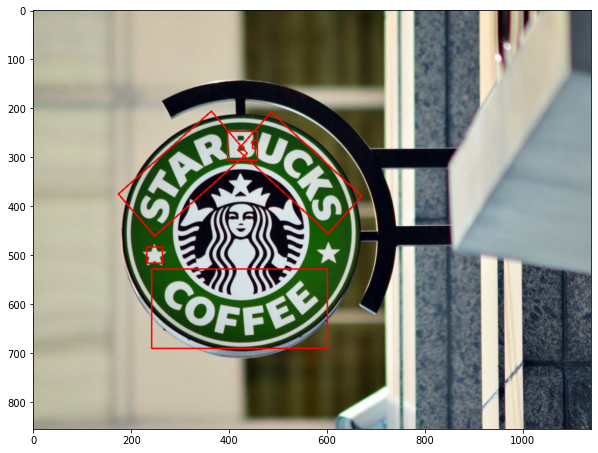

In [126]:
img_path2 = "./test1/starb.jpg"

ocr2 = PaddleOCR(det_db_score_mode="slow",lang="en")  #en  #slow
result2 = ocr2.ocr(img_path2, rec=False)
print(result2)
#---plot results
image2 = cv2.imread(img_path2)
for box in result2:
    box = np.reshape(np.array(box), [-1, 1, 2]).astype(np.int64)
    image2 = cv2.polylines(np.array(image2), [box], True, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image2)

- 多語言 偵測模型

[2022/06/15 15:25:25] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='slow', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='PaddleOCR_pub/inference/ml_PP-OCRv3_det_infer/', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script


[2022/06/15 15:25:26] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process


grep: warning: GREP_OPTIONS is deprecated; please use an alias or script


[[[264.0, 528.0], [587.0, 534.0], [585.0, 676.0], [262.0, 670.0]], [[207.0, 231.0], [644.0, 239.0], [640.0, 467.0], [203.0, 459.0]]]


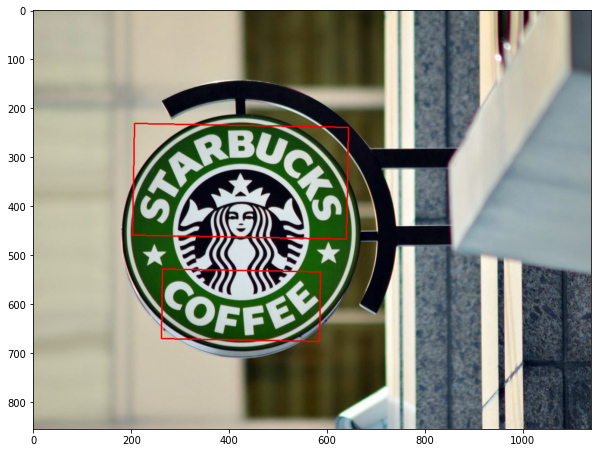

In [127]:
img_path2 = "./test1/starb.jpg"

ocr2 = PaddleOCR(det_db_score_mode="slow",lang="en",\
                 det_model_dir="PaddleOCR_pub/inference/ml_PP-OCRv3_det_infer/") 

result2 = ocr2.ocr(img_path2, rec=False)
print(result2)
# 显示结果
image2 = cv2.imread(img_path2)
boxes = [line[0] for line in result2]
for box in result2:
    box = np.reshape(np.array(box), [-1, 1, 2]).astype(np.int64)
    image2 = cv2.polylines(np.array(image2), [box], True, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image2)

### DB 視覺化分割圖

db 後處理
https://github.com/PaddlePaddle/PaddleOCR/blob/v2.5.0/notebook/notebook_ch/2.text_detection/%E6%96%87%E6%9C%AC%E6%A3%80%E6%B5%8B%E5%AE%9E%E8%B7%B5%E7%AF%87.ipynb

将如下代码添加到PaddleOCR/ppocr/postprocess/db_postprocess.py的177行，可以可视化DB输出的分割图，分割图的可视化结果保存为图像vis_segmentation.png

    _maps = np.array(pred[0, :, :] * 255).astype(np.uint8)
    import cv2
    cv2.imwrite("vis_segmentation.png", _maps)

In [46]:
# 1. 下载训练好的模型
!wget -nc -P PaddleOCR_pub/pretrain_models/ https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_mv3_db_v2.0_train.tar
!cd PaddleOCR_pub/pretrain_models/ && tar xf det_mv3_db_v2.0_train.tar && cd ../

--2022-06-15 11:18:36--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/det_mv3_db_v2.0_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34867200 (33M) [application/x-tar]
Saving to: ‘PaddleOCR_pub/pretrain_models/det_mv3_db_v2.0_train.tar’

det_mv3_db_v2.0_tra 100%[===================>]  33.25M  5.53MB/s    in 11s     

2022-06-15 11:18:47 (2.99 MB/s) - ‘PaddleOCR_pub/pretrain_models/det_mv3_db_v2.0_train.tar’ saved [34867200/34867200]



In [139]:
# 2. 执行文本检测预测得到结果
!python PaddleOCR/tools/infer_det.py -c PaddleOCR/configs/det/det_mv3_db.yml \
                           -o Global.checkpoints=PaddleOCR_pub/pretrain_models/det_mv3_db_v2.0_train/best_accuracy \
                              Global.infer_img=./test1/c1.jpg
                              #PostProcess.unclip_ratio=4.0
                              #PostProcess.box_thresh=0.2
# 注：有关PostProcess参数和Global参数介绍与使用参考 https://github.com/PaddlePaddle/PaddleOCR/blob/release%2F2.3/doc/doc_ch/config.md

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
[2022/06/15 15:41:32] ppocr INFO: Architecture : 
[2022/06/15 15:41:32] ppocr INFO:     Backbone : 
[2022/06/15 15:41:32] ppocr INFO:         model_name : large
[2022/06/15 15:41:32] ppocr INFO:         name : MobileNetV3
[2022/06/15 15:41:32] ppocr INFO:         scale : 0.5
[2022/06/15 15:41:32] ppocr INFO:     Head : 
[2022/06/15 15:41:32] ppocr INFO:         k : 50
[2022/06/15 15:41:32] ppocr INFO:         name : DBHead
[2022/06/15 15:41:32] ppocr INFO:     Neck : 
[2022/06/15 15:41:32] ppocr INFO:         name : DBFPN
[2022/06/15 15:41:32] ppocr INFO:         out_channels : 256
[2022/06/15 15:41:32] ppocr INFO:     Transform : None
[2022/06/15 15:41:32] ppocr INFO:     algorithm : DB
[2022/06/15 15:41:32] ppocr INFO:     model_type : det
[2022/06/15 15:41:32] ppocr INFO: Eval : 
[2022/06/15 15:41:32] ppocr INFO:     dataset : 
[2022/06/15 15:41:32] ppocr INFO:         data_dir : ./train_data/icdar2015/text_loc

- 印出結果圖片

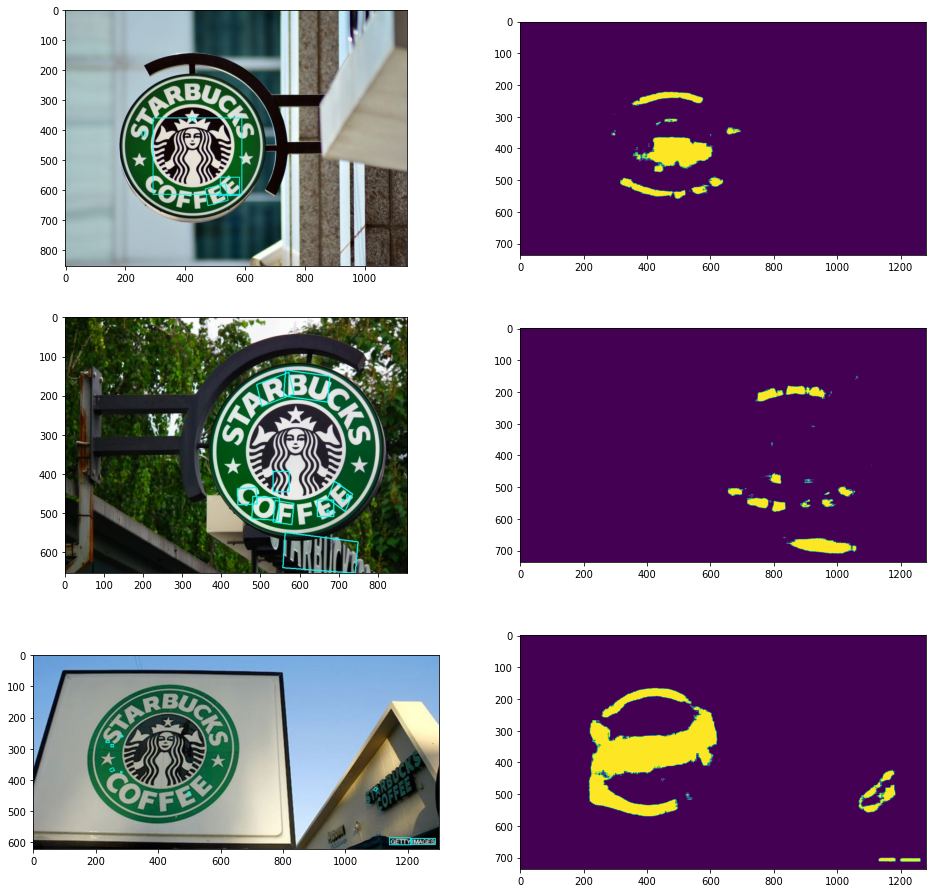

In [137]:
img1 = Image.open('./output/det_db/det_results/starb.jpg')
img2 = Image.open('./output/det_db/map/vis_segmentation_starb.png')
img3 = Image.open('./output/det_db/det_results/starb2.jpg')
img4 = Image.open('./output/det_db/map/vis_segmentation_starb2.png')
img5 = Image.open('./output/det_db/det_results/starb3.jpg')
img6 = Image.open('./output/det_db/map/vis_segmentation_starb3.png')

f, axarr = plt.subplots(3,2,figsize=(16, 16))
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)
axarr[2,0].imshow(img5)
axarr[2,1].imshow(img6)

- 換中文圖片試試看: 還是找的到一些 但直式的就找不到了

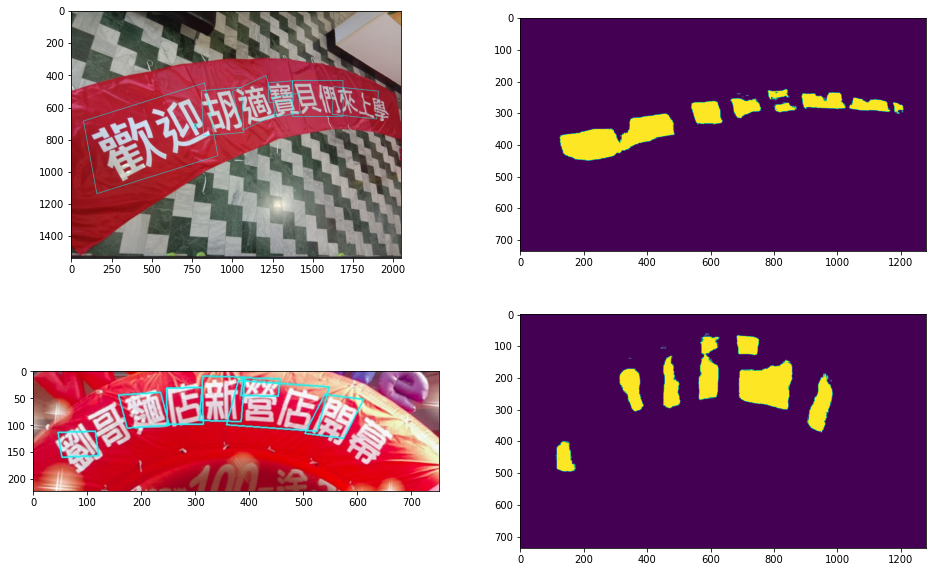

In [144]:
img1 = Image.open('./output/det_db/det_results/c1.jpg')
img2 = Image.open('./output/det_db/map/vis_segmentation_c1.png')
img3 = Image.open('./output/det_db/det_results/c2.jpg')
img4 = Image.open('./output/det_db/map/vis_segmentation_c2.png')

f, axarr = plt.subplots(2,2,figsize=(16, 10))
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)

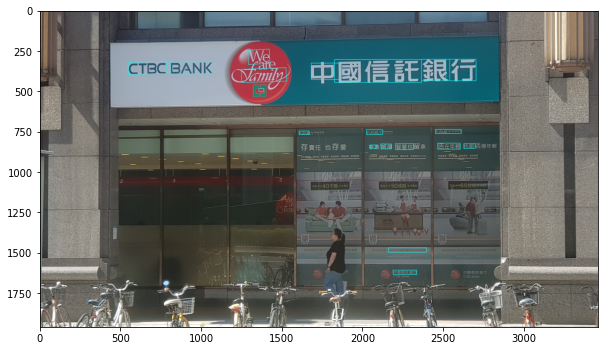

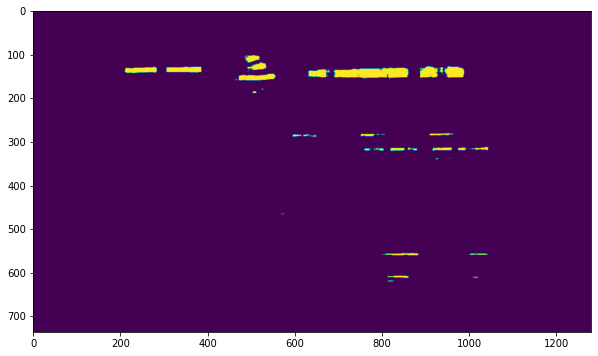

In [82]:
img = Image.open('./output/det_db/det_results/ct2.jpg')
img = np.array(img)
plt.figure(figsize=(10, 10))
plt.imshow(img)

img = Image.open('./vis_segmentation.png')
img = np.array(img)
plt.figure(figsize=(10, 10))
plt.imshow(img)


## Text detection: SAST

### SAST四邊形文本檢測（ICDAR2015）

https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_ch/algorithm_det_sast.md 
>self.det_algorithm == "SAST" and self.det_sast_polygon
self.det_algorithm in ["PSE", "FCE"] and  self.postprocess_op.box_type == 'poly'

- 運行前 要先將SAST文本檢測訓練過程中保存的模型，轉成inference model

In [87]:
%cd /workspace/Bibi_orchid/str/PaddleOCR

/workspace/Bibi_orchid/str/PaddleOCR


In [90]:
!python3 ./tools/export_model.py -c ./configs/det/det_r50_vd_sast_icdar15.yml -o Global.pretrained_model=/workspace/Bibi_orchid/str/PaddleOCR_pub/pretrain_models/det_r50_vd_sast_icdar15_v2.0_train/best_accuracy  Global.save_inference_dir=/workspace/Bibi_orchid/str/PaddleOCR_pub/inference/det_sast_ic15

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
W0615 14:20:49.322808  2199 gpu_context.cc:278] Please NOTE: device: 0, GPU Compute Capability: 6.1, Driver API Version: 11.0, Runtime API Version: 10.2
W0615 14:20:49.325500  2199 gpu_context.cc:306] device: 0, cuDNN Version: 7.6.
[2022/06/15 14:20:52] ppocr INFO: load pretrain successful from /workspace/Bibi_orchid/str/PaddleOCR_pub/pretrain_models/det_r50_vd_sast_icdar15_v2.0_train/best_accuracy
[2022/06/15 14:20:56] ppocr INFO: inference model is saved to /workspace/Bibi_orchid/str/PaddleOCR_pub/inference/det_sast_ic15/inference


In [109]:
!python3 tools/infer/predict_det.py \
--det_algorithm="SAST" \
--image_dir="/workspace/Bibi_orchid/str/test1/starb2.jpg"\
--det_model_dir="/workspace/Bibi_orchid/str/PaddleOCR_pub/inference/det_sast_ic15"

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
[2022/06/15 14:56:01] ppocr INFO: starb2.jpg	[[[385.0, 183.0], [789.0, 159.0], [792.0, 308.0], [380.0, 318.0]], [[409.0, 417.0], [737.0, 422.0], [753.0, 517.0], [421.0, 529.0]]]

[2022/06/15 14:56:01] ppocr INFO: The predict time of /workspace/Bibi_orchid/str/test1/starb2.jpg: 1.4334545135498047
[2022/06/15 14:56:01] ppocr INFO: The visualized image saved in ./inference_results/det_res_starb2.jpg


- 印出結果圖片

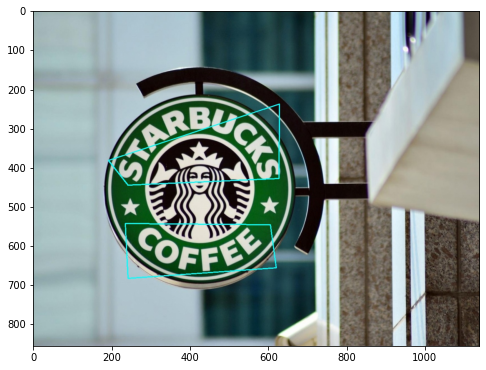

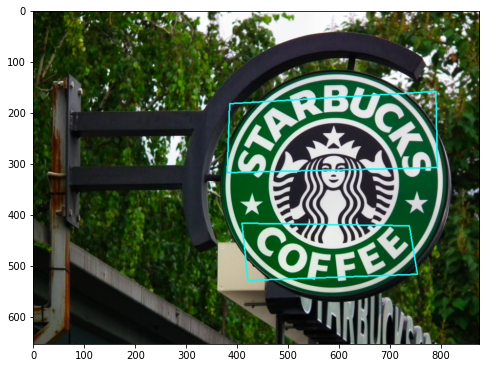

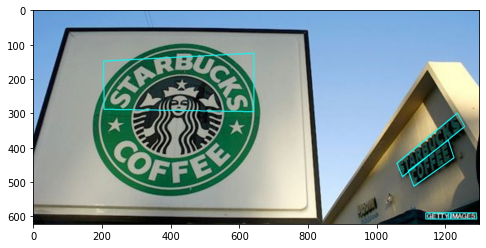

In [118]:
# show "SAST" inference results
img = Image.open("/workspace/Bibi_orchid/str/PaddleOCR/inference_results/SAST/det_res_starb.jpg")
img = np.array(img)
plt.figure(figsize=(8,8))
plt.imshow(img)

img = Image.open('/workspace/Bibi_orchid/str/PaddleOCR/inference_results/SAST/det_res_starb2.jpg')
img = np.array(img)
plt.figure(figsize=(8,8))
plt.imshow(img)

img = Image.open('/workspace/Bibi_orchid/str/PaddleOCR/inference_results/SAST/det_res_starb3.jpg')
img = np.array(img)
plt.figure(figsize=(8,8))
plt.imshow(img)

### SAST彎曲文本檢測（Total-Text）

運行前 要先將SAST文本檢測訓練過程中保存的模型，轉成inference model

In [104]:
!python3 ./tools/export_model.py \
-c configs/det/det_r50_vd_sast_totaltext.yml \
-o Global.pretrained_model=/workspace/Bibi_orchid/str/PaddleOCR_pub/pretrain_models/det_r50_vd_sast_totaltext_v2.0_train/best_accuracy  \
Global.save_inference_dir=/workspace/Bibi_orchid/str/PaddleOCR_pub/inference/det_sast_tt

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
W0615 14:50:22.063617  2432 gpu_context.cc:278] Please NOTE: device: 0, GPU Compute Capability: 6.1, Driver API Version: 11.0, Runtime API Version: 10.2
W0615 14:50:22.066570  2432 gpu_context.cc:306] device: 0, cuDNN Version: 7.6.
[2022/06/15 14:50:25] ppocr INFO: load pretrain successful from /workspace/Bibi_orchid/str/PaddleOCR_pub/pretrain_models/det_r50_vd_sast_totaltext_v2.0_train/best_accuracy
[2022/06/15 14:50:29] ppocr INFO: inference model is saved to /workspace/Bibi_orchid/str/PaddleOCR_pub/inference/det_sast_tt/inference


In [149]:
!python3 ./tools/infer/predict_det.py \
--det_algorithm="SAST" --image_dir="/workspace/Bibi_orchid/str/test1/starb2.jpg" \
--det_model_dir="/workspace/Bibi_orchid/str/PaddleOCR_pub/inference/det_sast_tt/" \
--det_sast_polygon=True

grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
[2022/06/15 14:56:17] ppocr INFO: starb2.jpg	[[[381.0, 310.0], [449.0, 203.0], [544.0, 148.0], [638.0, 147.0], [742.0, 207.0], [790.0, 307.0], [725.0, 353.0], [691.0, 258.0], [622.0, 215.0], [555.0, 219.0], [491.0, 262.0], [460.0, 343.0]], [[453.0, 406.0], [514.0, 438.0], [554.0, 451.0], [606.0, 456.0], [653.0, 441.0], [699.0, 403.0], [757.0, 460.0], [679.0, 522.0], [614.0, 542.0], [548.0, 540.0], [487.0, 516.0], [416.0, 468.0]], [[518.0, 549.0], [581.0, 551.0], [609.0, 549.0], [634.0, 545.0], [657.0, 546.0], [705.0, 534.0], [709.0, 653.0], [656.0, 653.0], [632.0, 653.0], [608.0, 653.0], [576.0, 636.0], [507.0, 589.0]]]

[2022/06/15 14:56:17] ppocr INFO: The predict time of /workspace/Bibi_orchid/str/test1/starb2.jpg: 1.3606312274932861
[2022/06/15 14:56:17] ppocr INFO: The visualized image saved in ./inference_results/det_res_starb2.jpg


- 印出結果圖片

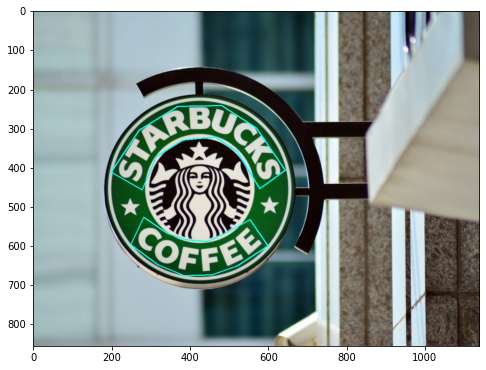

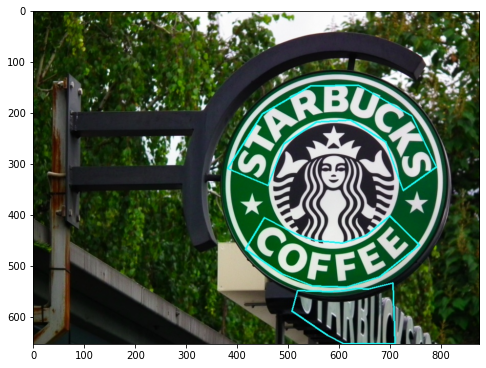

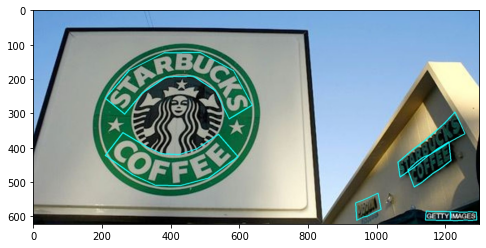

In [117]:
# show "SAST" inference results
img = Image.open("/workspace/Bibi_orchid/str/PaddleOCR/inference_results/SAST_poly/det_res_starb.jpg")
img = np.array(img)
plt.figure(figsize=(8,8))
plt.imshow(img)

img = Image.open('/workspace/Bibi_orchid/str/PaddleOCR/inference_results/SAST_poly/det_res_starb2.jpg')
img = np.array(img)
plt.figure(figsize=(8,8))
plt.imshow(img)

img = Image.open('/workspace/Bibi_orchid/str/PaddleOCR/inference_results/SAST_poly/det_res_starb3.jpg')
img = np.array(img)
plt.figure(figsize=(8,8))
plt.imshow(img)

## End-to-End: PGNet

https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_ch/algorithm_e2e_pgnet.md

In [145]:
# # 下载英文端到端模型并解压
# !mkdir inference && cd inference
# !wget https://paddleocr.bj.bcebos.com/dygraph_v2.0/pgnet/e2e_server_pgnetA_infer.tar && tar xf e2e_server_pgnetA_infer.tar

In [152]:
# 预测image_dir指定的图像集合
!python3 ./tools/infer/predict_e2e.py \
--e2e_algorithm="PGNet" --image_dir="/workspace/Bibi_orchid/str/test1/" \
--e2e_model_dir="/workspace/Bibi_orchid/str/PaddleOCR_pub/inference/e2e_server_pgnetA_infer/" \
--e2e_pgnet_valid_set="totaltext"


grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
grep: warning: GREP_OPTIONS is deprecated; please use an alias or script
[2022/06/15 16:00:46] ppocr INFO: Predict time of /workspace/Bibi_orchid/str/test1/c1.jpg: 0.9280331134796143
[2022/06/15 16:00:46] ppocr INFO: The visualized image saved in ./inference_results/e2e_res_c1.jpg
[2022/06/15 16:00:46] ppocr INFO: Predict time of /workspace/Bibi_orchid/str/test1/c2.jpg: 0.05131030082702637
[2022/06/15 16:00:46] ppocr INFO: The visualized image saved in ./inference_results/e2e_res_c2.jpg
[2022/06/15 16:00:46] ppocr INFO: Predict time of /workspace/Bibi_orchid/str/test1/ct1.jpg: 0.058216094970703125
[2022/06/15 16:00:46] ppocr INFO: The visualized image saved in ./inference_results/e2e_res_ct1.jpg
[2022/06/15 16:00:46] ppocr INFO: Predict time of /workspace/Bibi_orchid/str/test1/ct2.jpg: 0.12020063400268555
[2022/06/15 16:00:46] ppocr INFO: The visualized image saved in ./inference_results/e2e_res_ct2.jpg
[2022/06/1

- 印出結果圖片

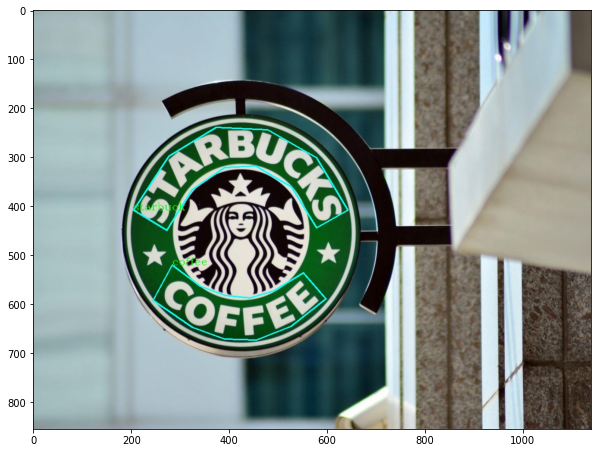

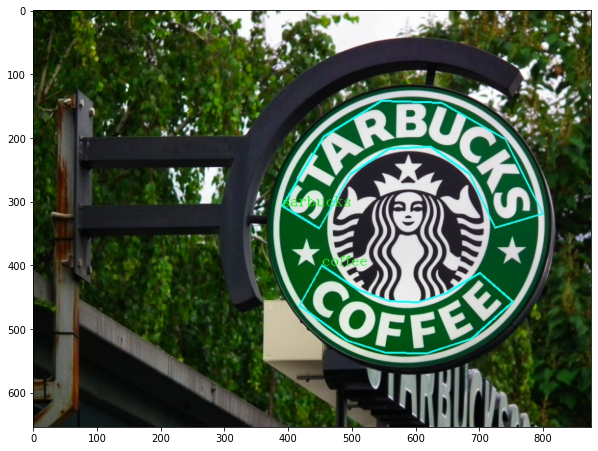

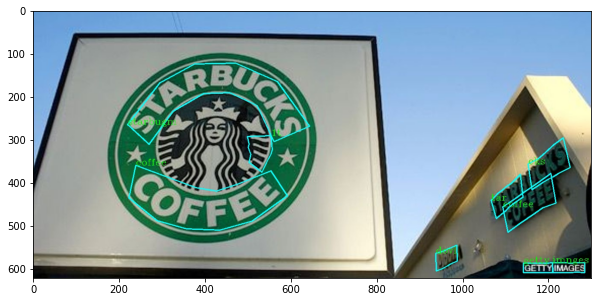

In [155]:
# show "PGNet" inference results
img = Image.open("/workspace/Bibi_orchid/str/PaddleOCR/inference_results/e2e/e2e_res_starb.jpg")
img = np.array(img)
plt.figure(figsize=(10,10))
plt.imshow(img)

img = Image.open('/workspace/Bibi_orchid/str/PaddleOCR/inference_results/e2e/e2e_res_starb2.jpg')
img = np.array(img)
plt.figure(figsize=(10,10))
plt.imshow(img)

img = Image.open('/workspace/Bibi_orchid/str/PaddleOCR/inference_results/e2e/e2e_res_starb3.jpg')
img = np.array(img)
plt.figure(figsize=(10,10))
plt.imshow(img)